In [ ]:
%pip install seaborn
%pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#Load the data
data = pd.read_csv('../datos/Data_p.csv', sep=";")

In [3]:
# Aplicando técnica de Interpolación de datos al Dataset Original
def interpolate_rows(row1, row2):
    interpolated_row = {}
    for feature in data.columns:
        if feature != 'Sex':
            interpolated_row[feature] = round((row1[feature] + row2[feature]) / 2, 4)
        else:
            interpolated_row[feature] = round((row1[feature] + row2[feature]) / 2)
    return interpolated_row


interpolated_rows = []
for i in range(20):
  for i in range(len(data) - 1):
    row1 = data.iloc[i]
    row2 = data.iloc[i + 1]
    new_row = interpolate_rows(row1, row2)
    interpolated_rows.append(new_row)

interpolated_df = pd.DataFrame(interpolated_rows)
augmented_data = pd.concat([data, interpolated_df], ignore_index=True)

augmented_data_info = {
    "description": augmented_data.describe(),
    "info": augmented_data.info()
}

augmented_data.to_csv('datosaumentados.csv')
augmented_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1492 non-null   int64  
 1   TotalLength     1492 non-null   float64
 2   StandardLength  1492 non-null   float64
 3   HeadLength      1492 non-null   float64
 4   TotalWeight     1492 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 58.4 KB


{'description':                Sex  TotalLength  StandardLength   HeadLength  TotalWeight
 count  1492.000000  1492.000000     1492.000000  1492.000000  1492.000000
 mean      0.345845    24.127882       19.513405     6.742225   297.680054
 std       0.475802     1.110006        1.931401     4.266917    42.232902
 min       0.000000    21.000000       17.200000     5.100000   205.350000
 25%       0.000000    23.100000       18.050000     5.800000   263.790000
 50%       0.000000    24.450000       19.550000     6.000000   305.250000
 75%       1.000000    25.150000       20.250000     6.300000   333.275000
 max       1.000000    26.100000       25.600000    56.000000   390.020000,
 'info': None}

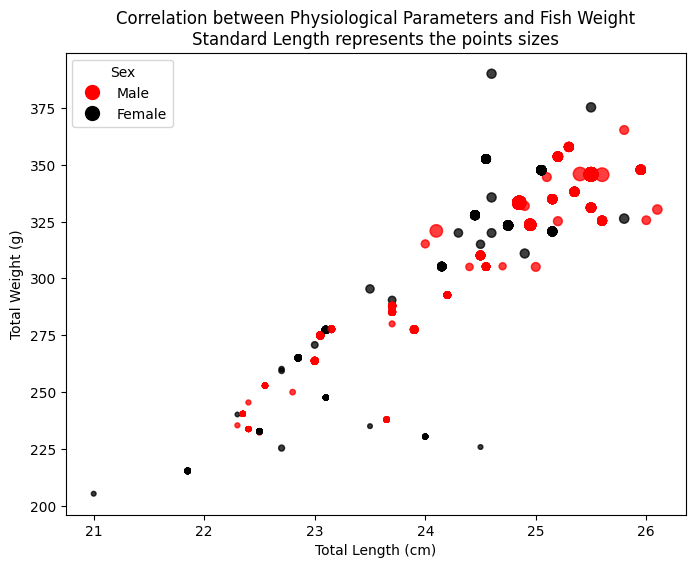

In [4]:
#Análisis de Correlación de variables con la variable a predecir Total Weight
#mediante Visualización de datos

data = augmented_data
x = data['TotalLength']
y = data['TotalWeight']
sizes =(data['StandardLength'] - min(data['StandardLength']) + 1 ) * 10  

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, s=sizes, c=data['Sex'], cmap='flag', alpha=0.5)

plt.title('Correlation between Physiological Parameters and Fish Weight\nStandard Length represents the points sizes')
plt.xlabel('Total Length (cm)')
plt.ylabel('Total Weight (g)')

# Añadir una barra de color para representar los grupos de 'Sexo'
#cbar = plt.colorbar(scatter)
#cbar.set_ticks([0, 1])
#cbar.set_ticklabels(['Macho', 'Hembra'])  # Ajusta las etiquetas según tu mapeo

legend_items = [mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Male'),
                mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='Female')]


plt.legend(handles=legend_items, title='Sex', loc='upper left')


plt.grid(False)
plt.show()


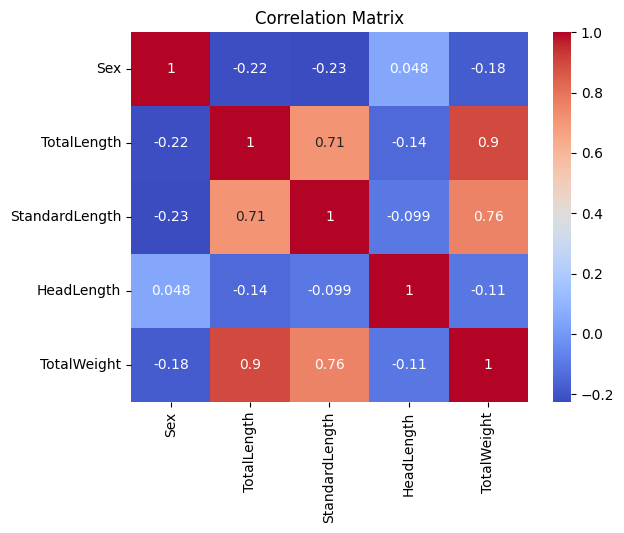

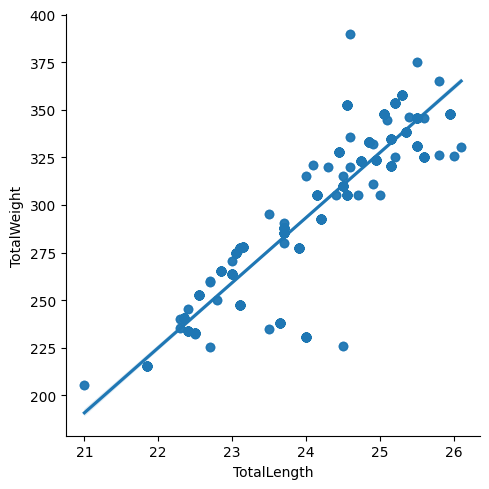

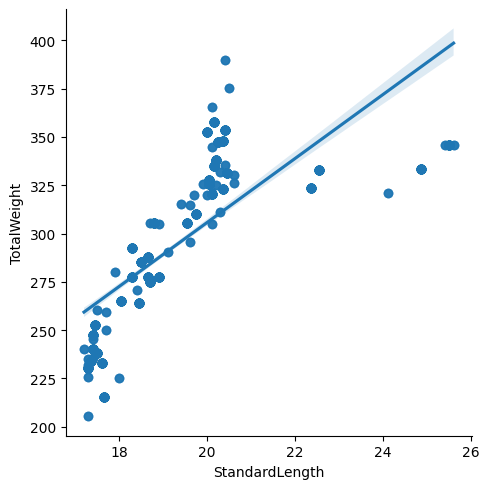

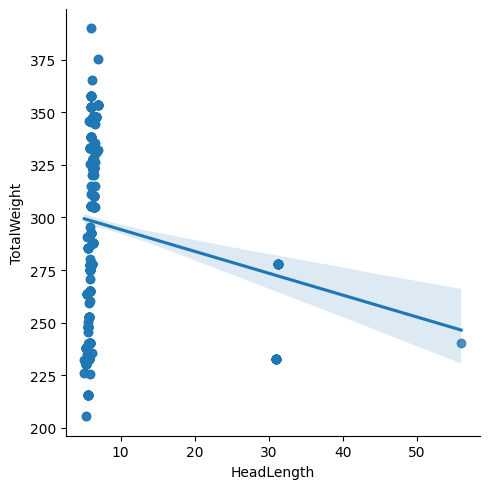

In [5]:
#Análisis de Correlación con Mapa de Calor y Gráficos de Dispersión
data = augmented_data
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

fig = sns.lmplot(data=data, x='TotalLength',y='TotalWeight')
plt.show()
fig = sns.lmplot(data=data, x='StandardLength',y='TotalWeight')
plt.show()
fig = sns.lmplot(data=data, x='HeadLength',y='TotalWeight')
plt.show()

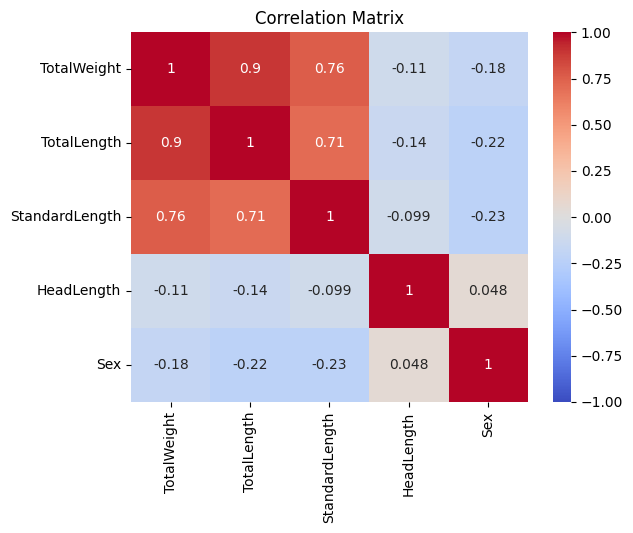

In [6]:
# Reordenar la matriz de correlación para que 'TotalWeight' sea la primera variable
# y se ubique en la diagonal principal
ordered_columns = ['TotalWeight', 'TotalLength', 'StandardLength', 'HeadLength', 'Sex']
correlation_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# Generar el heatmap de la matriz de correlación reordenada
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


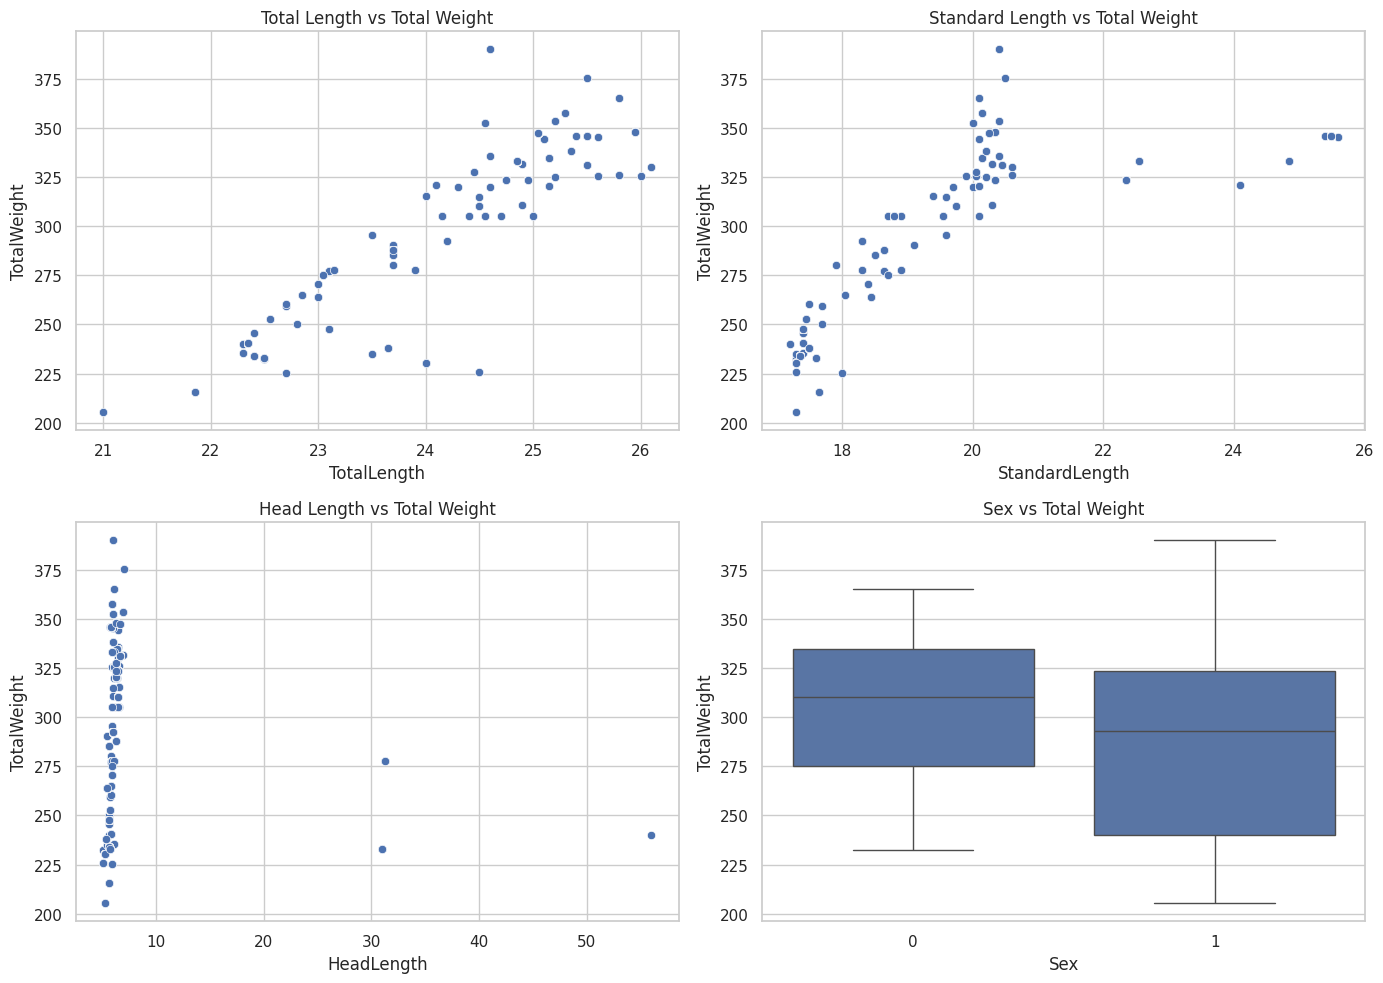

In [ ]:
#Análisis de Correlación con Gráficos de Dispersión y varias combinaciones
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=augmented_data, x="TotalLength", y="TotalWeight", ax=axs[0, 0])
axs[0, 0].set_title("Total Length vs Total Weight")


sns.scatterplot(data=augmented_data, x="StandardLength", y="TotalWeight", ax=axs[0, 1])
axs[0, 1].set_title("Standard Length vs Total Weight")


sns.scatterplot(data=augmented_data, x="HeadLength", y="TotalWeight", ax=axs[1, 0])
axs[1, 0].set_title("Head Length vs Total Weight")


sns.boxplot(data=augmented_data, x="Sex", y="TotalWeight", ax=axs[1, 1])
axs[1, 1].set_title("Sex vs Total Weight")

plt.tight_layout()
plt.show()


In [22]:
#Análisis de Importancia de variables frente a la variable de salida TotalWeight
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

data = pd.get_dummies(augmented_data, columns=['Sex'], drop_first=True)
# Dividir los datos en características (X) y objetivo (y)
X = data.drop('TotalWeight', axis=1)
y = data['TotalWeight']

#Usando RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

#Usando Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_scaled, y)
coef = lasso_cv.coef_
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})
significant_features = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)
significant_features


,Feature,Coefficient
0,TotalLength,30.902454
1,StandardLength,10.555288
3,Sex_1,1.578042
2,HeadLength,0.930096


In [23]:
#Análisis Comparativo de varios algoritmos de ML 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, explained_variance_score

import numpy as np

X = augmented_data[['TotalLength', 'StandardLength']]
y = augmented_data['TotalWeight']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


polynomial_features = PolynomialFeatures(degree=2)
polynomial_model = make_pipeline(polynomial_features, LinearRegression())
polynomial_model.fit(X_train, y_train)

# Modelos a estudiar
models = {
    "Linear": LinearRegression(),
    "Polynomial": polynomial_model,
    "Support Vector": SVR(),
    "Ridge": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
  }

# Diccionario para almacenar los resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    maxerror =  max_error(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE":mae, "MaxError":maxerror, "EVar":explained_variance, "R2": r2}

results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE,MAE,MaxError,EVar,R2
Linear,260.328449,16.134697,12.290103,51.193166,0.851867,0.850875
Polynomial,151.830033,12.321933,9.683353,29.544363,0.913658,0.913026
Support Vector,149.155494,12.212923,9.064981,32.917410,0.915703,0.914559
Ridge,260.397784,16.136846,12.292136,51.169068,0.851828,0.850835
Random Forest,8.316080,2.883762,0.519968,22.396350,0.995292,0.995236
Decision Tree,6.289041,2.507796,0.326455,21.485000,0.996431,0.996397


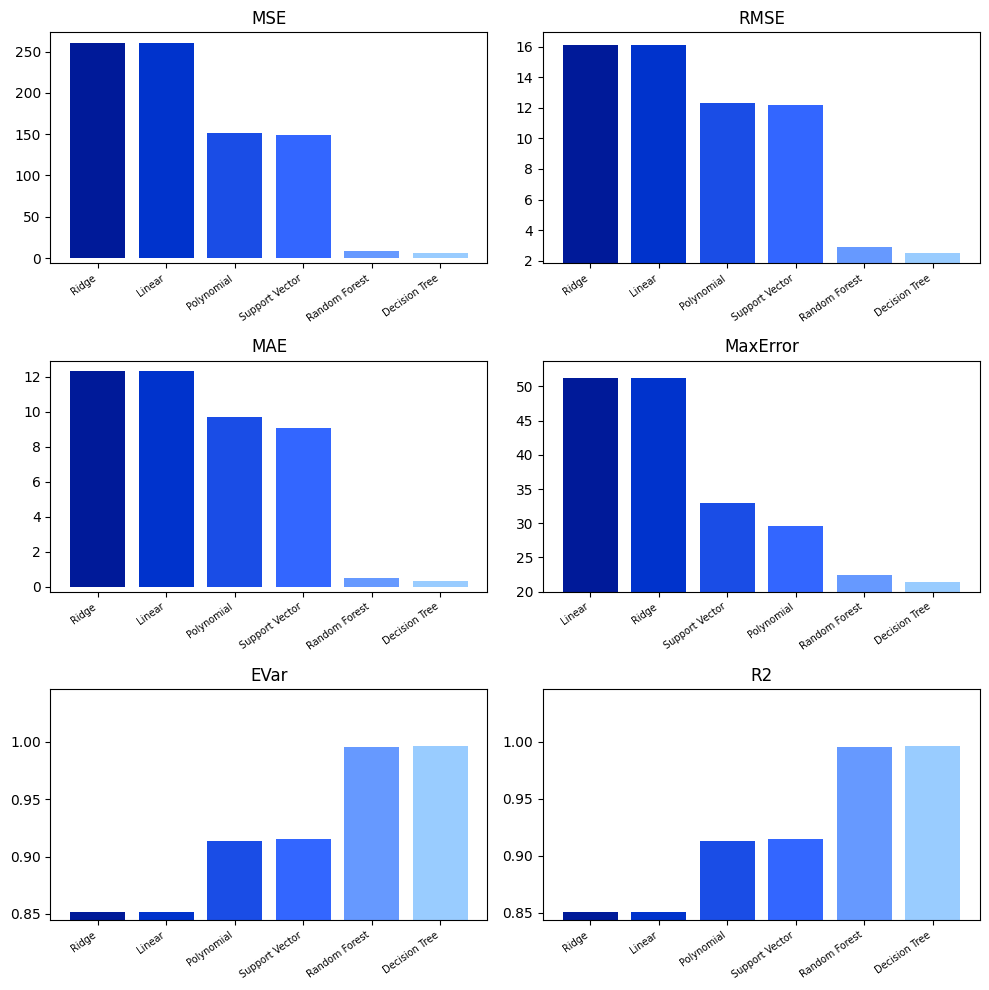

In [24]:
 #Visualización de la comparativa
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), tight_layout=True)

colors = [
    (0.0, 0.1, 0.6),  # Darker blue
    (0.0, 0.2, 0.8),
    (0.1, 0.3, 0.9),
    (0.2, 0.4, 1.0),
    (0.4, 0.6, 1.0),
    (0.6, 0.8, 1.0),  # Lighter blue
]

#Ordanando los algoritmos según la métrica (Asc o Desc)
#Ubicando al final al mejor algoritmo

metrics = results_df.columns[0:]
for ax, metric in zip(axs.flat, metrics):
    sorted_df = results_df.sort_values(by=metric, ascending=  metric in ['R2','EVar'] )

    x_ticks = np.arange(len(sorted_df))
    #ax.plot(x_ticks, sorted_df[metric], marker='o', linestyle='-')
    ax.bar(x_ticks, sorted_df[metric], color= colors)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(sorted_df.index.tolist(), rotation=35, ha='right', fontsize=7)

    ax.set_title(metric)

    min_value = sorted_df[metric].min()
    margin = (sorted_df[metric].max() - min_value) * 0.05  # Margen del 10% del rango
    ax.set_ylim(bottom=min_value - margin)

plt.show()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warning

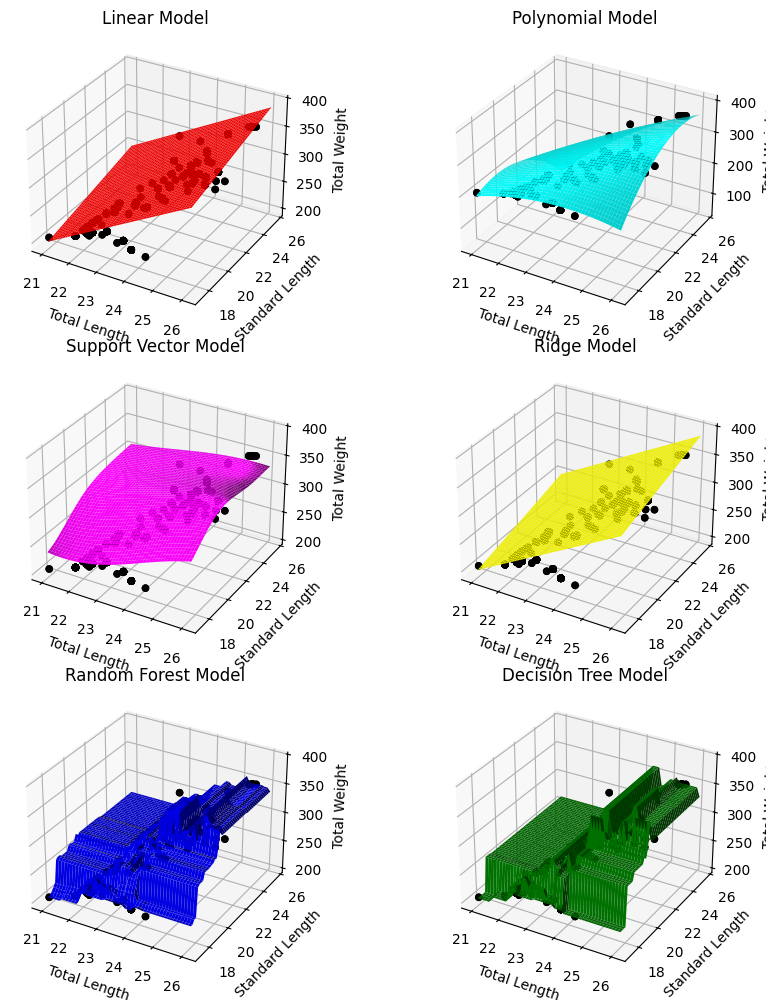

In [25]:
#Análisis del rendimiento predictivo de cada Modelo mediante Visualización de los datos
#Se consideran 3 variables

fig = plt.figure(figsize=(10, 10))

x_surf = np.linspace(X['TotalLength'].min(), X['TotalLength'].max(), 50)
y_surf = np.linspace(X['StandardLength'].min(), X['StandardLength'].max(), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)


poly_features = PolynomialFeatures(degree=2)
xy_poly = poly_features.fit_transform(np.column_stack((x_surf.ravel(), y_surf.ravel())))

plot_counter = 1

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for name, model in models.items():
    ax = fig.add_subplot(3, 2, plot_counter, projection='3d')
    plot_counter += 1

    # Verificar si el modelo actual es el modelo polinomial y predecir usando el pipeline
    if name == 'Polynomial':
        z_surf = model.predict(np.column_stack((x_surf.ravel(), y_surf.ravel()))).reshape(x_surf.shape)
    else:
        z_surf = model.predict(np.column_stack((x_surf.ravel(), y_surf.ravel()))).reshape(x_surf.shape)

    ax.plot_surface(x_surf, y_surf, z_surf, color=colors[plot_counter % len(colors)])

    ax.scatter(X['TotalLength'], X['StandardLength'], y, color='black', alpha=1.0)

    ax.set_title(f"{name} Model")
    ax.set_xlabel('Total Length')
    ax.set_ylabel('Standard Length')
    ax.set_zlabel('Total Weight')

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()

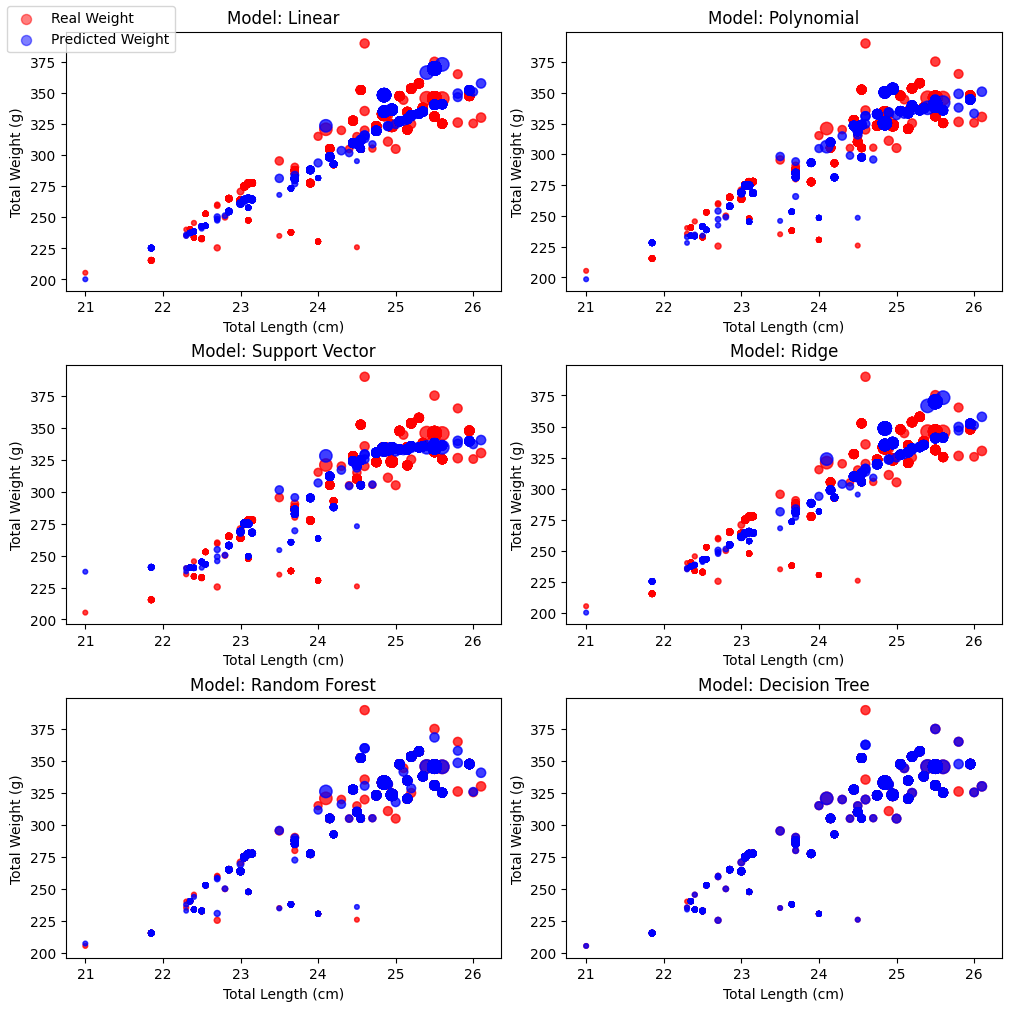

In [26]:
#Análisis del rendimiento predictivo de cada Modelo mediante Visualización de los datos
#Se consideran 2 variables

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

PointSize = (X['StandardLength'] - min(X['StandardLength']) + 1) * 10   # Ajusta este valor según sea necesario

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), constrained_layout=True)

for ax, (model_name, model) in zip(axs.flat, models.items()):
    scatter_real = ax.scatter(X['TotalLength'], y,  s=PointSize,
                              c='red', label='Real Weight', alpha=0.5)

    scatter_pred = ax.scatter(X['TotalLength'],  model.predict(X),s=PointSize,
                              c='blue', label='Predicted Weight', alpha=0.5)

    ax.set_title(f'Model: {model_name}')
    ax.set_xlabel('Total Length (cm)')
    ax.set_ylabel('Total Weight (g)')
    ax.grid(False)

# Añade una leyenda general. Si hay demasiados subplots para ajustar la leyenda dentro de cada uno,
# considera añadir una leyenda fuera de los subplots o usa la leyenda de uno de ellos como referencia.
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

plt.show()